<a href="https://colab.research.google.com/github/guumaster/colab-nbs/blob/master/books/deep-learning-with-python/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [5]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.7546741]
 [ 1.6853006]
 [ 1.3082972]], shape=(3, 1), dtype=float32)


In [6]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.16987407]
 [0.14554465]
 [0.69800794]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [7]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.8027043],
       [ 0.9337512],
       [ 0.4732945]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [9]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [11]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [13]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [14]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [23]:
c.numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [24]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [25]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using `GradientTape` with constant tensor inputs**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [26]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [27]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [28]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

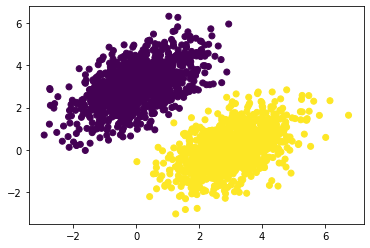

In [29]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [30]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [31]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [32]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [33]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [35]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0268
Loss at step 1: 0.0266
Loss at step 2: 0.0264
Loss at step 3: 0.0262
Loss at step 4: 0.0260
Loss at step 5: 0.0258
Loss at step 6: 0.0257
Loss at step 7: 0.0256
Loss at step 8: 0.0254
Loss at step 9: 0.0253
Loss at step 10: 0.0252
Loss at step 11: 0.0251
Loss at step 12: 0.0250
Loss at step 13: 0.0250
Loss at step 14: 0.0249
Loss at step 15: 0.0248
Loss at step 16: 0.0248
Loss at step 17: 0.0247
Loss at step 18: 0.0247
Loss at step 19: 0.0246
Loss at step 20: 0.0246
Loss at step 21: 0.0245
Loss at step 22: 0.0245
Loss at step 23: 0.0245
Loss at step 24: 0.0244
Loss at step 25: 0.0244
Loss at step 26: 0.0244
Loss at step 27: 0.0243
Loss at step 28: 0.0243
Loss at step 29: 0.0243
Loss at step 30: 0.0243
Loss at step 31: 0.0243
Loss at step 32: 0.0242
Loss at step 33: 0.0242
Loss at step 34: 0.0242
Loss at step 35: 0.0242
Loss at step 36: 0.0242
Loss at step 37: 0.0242
Loss at step 38: 0.0242
Loss at step 39: 0.0242


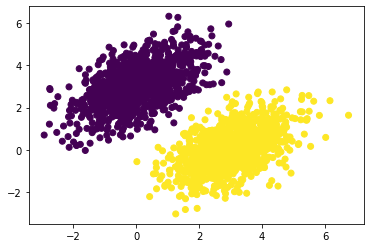

In [36]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

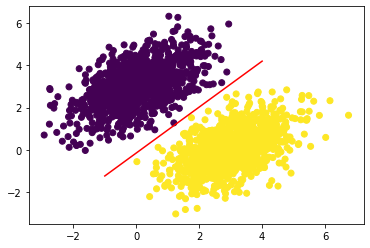

In [37]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: Building layers on the fly

In [41]:
import keras
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [39]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [43]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [44]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [54]:
history = model.fit(
    inputs,
    targets,
    epochs=55,
    batch_size=128
)

Epoch 1/55
16/16 [==============================] - 0s 3ms/step - loss: 2.1595 - binary_accuracy: 0.2995
Epoch 2/55
16/16 [==============================] - 0s 2ms/step - loss: 2.0305 - binary_accuracy: 0.3015
Epoch 3/55
16/16 [==============================] - 0s 2ms/step - loss: 1.9063 - binary_accuracy: 0.3050
Epoch 4/55
16/16 [==============================] - 0s 2ms/step - loss: 1.7863 - binary_accuracy: 0.3115
Epoch 5/55
16/16 [==============================] - 0s 2ms/step - loss: 1.6709 - binary_accuracy: 0.3095
Epoch 6/55
16/16 [==============================] - 0s 2ms/step - loss: 1.5600 - binary_accuracy: 0.3160
Epoch 7/55
16/16 [==============================] - 0s 2ms/step - loss: 1.4535 - binary_accuracy: 0.3205
Epoch 8/55
16/16 [==============================] - 0s 2ms/step - loss: 1.3494 - binary_accuracy: 0.3240
Epoch 9/55
16/16 [==============================] - 0s 3ms/step - loss: 1.2511 - binary_accuracy: 0.3290
Epoch 10/55
16/16 [==============================] - 0s

In [55]:
history.history

{'loss': [2.1594760417938232,
  2.030463457107544,
  1.9062608480453491,
  1.7862752676010132,
  1.6709306240081787,
  1.5599650144577026,
  1.4535400867462158,
  1.3493964672088623,
  1.251136302947998,
  1.1577328443527222,
  1.0679935216903687,
  0.9821935296058655,
  0.9009076952934265,
  0.8237124681472778,
  0.7506288886070251,
  0.6825631856918335,
  0.618187427520752,
  0.5580447912216187,
  0.5021182894706726,
  0.4499587416648865,
  0.4028379023075104,
  0.3596005439758301,
  0.3200051188468933,
  0.28498703241348267,
  0.25421378016471863,
  0.22656689584255219,
  0.20302289724349976,
  0.1829858422279358,
  0.16585804522037506,
  0.15071097016334534,
  0.1372319608926773,
  0.12495489418506622,
  0.11407497525215149,
  0.10452838987112045,
  0.09626942127943039,
  0.08941063284873962,
  0.08375997841358185,
  0.07909134775400162,
  0.07519213110208511,
  0.07167676091194153,
  0.06848560273647308,
  0.06542298197746277,
  0.06250006705522537,
  0.059667568653821945,
  0.056

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [56]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 0s 2ms/step - loss: 0.1875 - binary_accuracy: 0.9743 - val_loss: 0.0593 - val_binary_accuracy: 0.9717
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0741 - binary_accuracy: 0.9514 - val_loss: 0.0597 - val_binary_accuracy: 0.9683
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0692 - binary_accuracy: 0.9607 - val_loss: 0.0671 - val_binary_accuracy: 0.9567
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0759 - binary_accuracy: 0.9521 - val_loss: 0.0597 - val_binary_accuracy: 0.9700
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0712 - binary_accuracy: 0.9529 - val_loss: 0.0239 - val_binary_accuracy: 1.0000


### Inference: Using a model after training

In [63]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])
print(( predictions[:10] > 0.5) == (val_targets[:10] == 1))



5/5 [==============================] - 0s 2ms/step
[[ 0.10424334]
 [ 0.05714869]
 [ 1.082906  ]
 [ 0.8855481 ]
 [ 0.7905377 ]
 [-0.08637595]
 [ 1.5063617 ]
 [ 0.9268433 ]
 [-0.03463662]
 [ 0.141931  ]]
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


## Summary